In [1]:
from s3prl.downstream.mdd.dataset import L2ArcticDataset
from s3prl.downstream.augment_utils.add_noise import AddNoise
from IPython.display import Audio, display
from pathlib import Path
import torch
import torchaudio
import numpy as np

2024-04-22 18:58:10.539939: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 18:58:10.566793: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-22 18:58:11.174280: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
folder = Path('/home/xt0r3-user/cambridge/partii/dissertation/s3prl/data/rir/Audio')

wavs = []
srs = []

for path in folder.iterdir():
    if path.suffix != '.wav':
        continue
    wav, sr = torchaudio.load(path)
    wav = wav.squeeze()
    wav = wav / wav.norm()
    wavs.append(wav)
    srs.append(sr)
sr = srs[0]


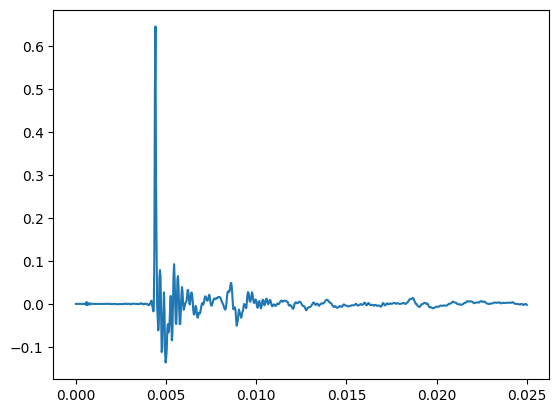

In [3]:
from matplotlib import pyplot as plt

def plot(wav, ax=None,**kwargs):
    if ax is not None:
        ax.plot(np.linspace(0, len(wav) / sr, wav.shape[-1]), wav, **kwargs)
    else:
        plt.plot(np.linspace(0, len(wav) / sr, wav.shape[-1]), wav, **kwargs)

plot(wavs[3][:int(0.025*sr)])

In [4]:
dataset = L2ArcticDataset(
    "train",
    "/home/xt0r3-user/cambridge/partii/dissertation/s3prl/data/l2arctic_release_v5.0",
    "/home/xt0r3-user/cambridge/partii/dissertation/s3prl/s3prl/s3prl/downstream/mdd/data/",
)

Skipping malformatted TextGrid file: /home/xt0r3-user/cambridge/partii/dissertation/s3prl/data/l2arctic_release_v5.0/YDCK/annotation/arctic_a0272.TextGrid
Skipping malformatted TextGrid file: /home/xt0r3-user/cambridge/partii/dissertation/s3prl/data/l2arctic_release_v5.0/YDCK/annotation/arctic_a0209.TextGrid


In [5]:
def play_audio(waveform, sample_rate):
    waveform = waveform.numpy()
    display(Audio(waveform, rate=sample_rate))


audio = [
    torchaudio.functional.resample(dataset[0][0], orig_freq=44100, new_freq=16000),
    torchaudio.functional.resample(dataset[1][0], orig_freq=44100, new_freq=16000),
]

In [6]:
Audio(torchaudio.functional.fftconvolve(audio[0], wavs[30]), rate=16000)

In [7]:
Audio(torchaudio.functional.fftconvolve(audio[0], wavs[12]), rate=16000)

In [8]:
Audio(audio[0], rate=16000)

In [9]:
def plot_rev(x, **kwargs):
    plot(torchaudio.functional.fftconvolve(audio[0], wavs[x]), **kwargs)

In [23]:
plt.figure(figsize=(10, 5))
def plot_shift(t):
    mult = 2000
    wav = wavs[1][239:]
    sound = audio[0][: len(audio[0]) // 4]
    if t != 0:
        sound = sound[:-t * mult]
    # if t == 0:
    #     plt.plot(audio[0][t*mult:] * wavs[3][t], alpha=(wav / wav.max()).item())
    # else:
    plt.plot(
        torch.cat([torch.zeros(t * mult), sound]),
        alpha=min(1, (wav[t].abs() / wav.max()).item() + 0.2),
    )


for i in range(0, 6):
    # [0, 1, 2, 3]
    plot_shift(i)
    plt.axis("off")
    plt.savefig(
        f"/home/xt0r3-user/cambridge/partii/dissertation/final/figs/chapter-3/reverb/rev_{i}.png",
        bbox_inches="tight",
    )
    plt.clf()

<Figure size 1000x500 with 0 Axes>

In [11]:
wavs[1].argmax()

tensor(239)

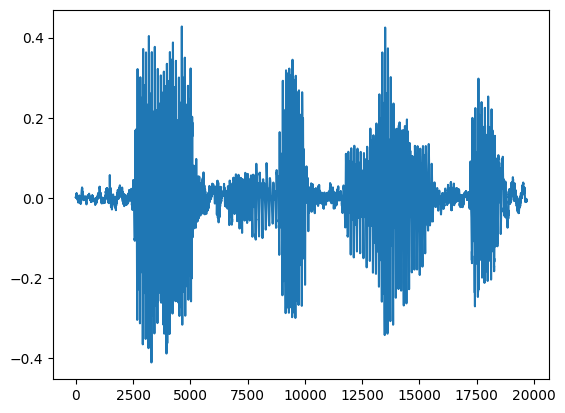

In [12]:
plt.plot(audio[0][:len(audio[0]) // 4])

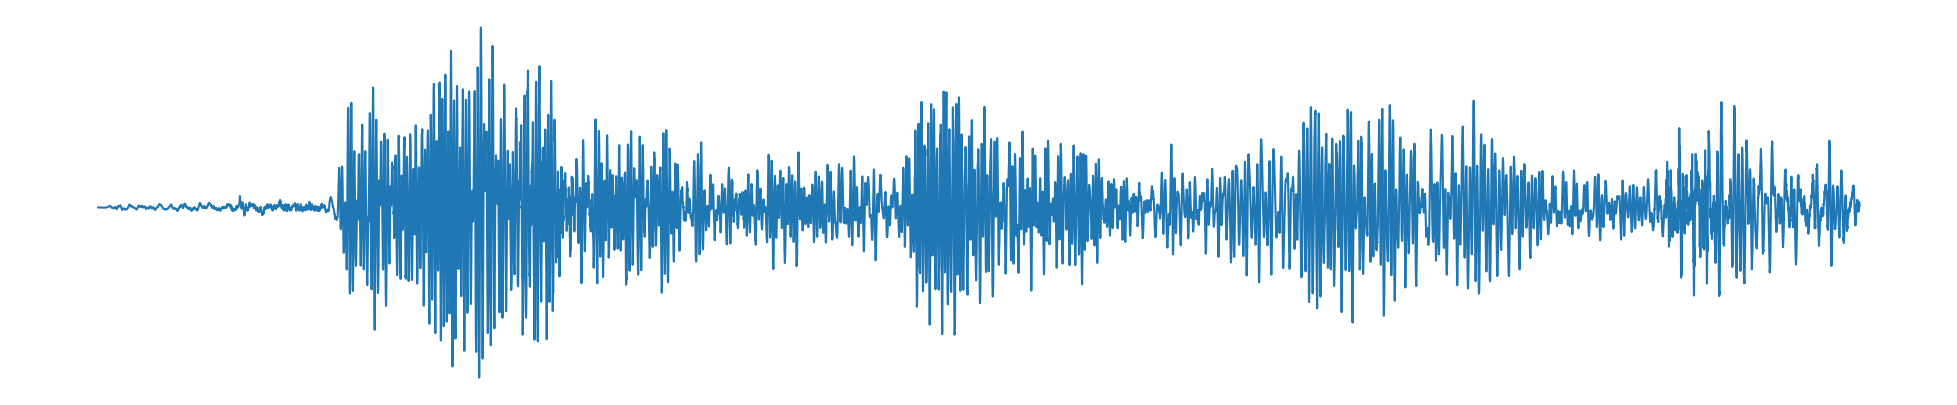

In [13]:
plt.figure(figsize=(25, 5))
plt.plot(torchaudio.functional.fftconvolve(audio[0][:len(audio[0]) // 4], wavs[1][141:])[:len(audio[0]) // 4])
plt.axis('off')
plt.savefig(
        f"/home/xt0r3-user/cambridge/partii/dissertation/final/figs/chapter-3/reverb/result.png",
        bbox_inches="tight",
    )

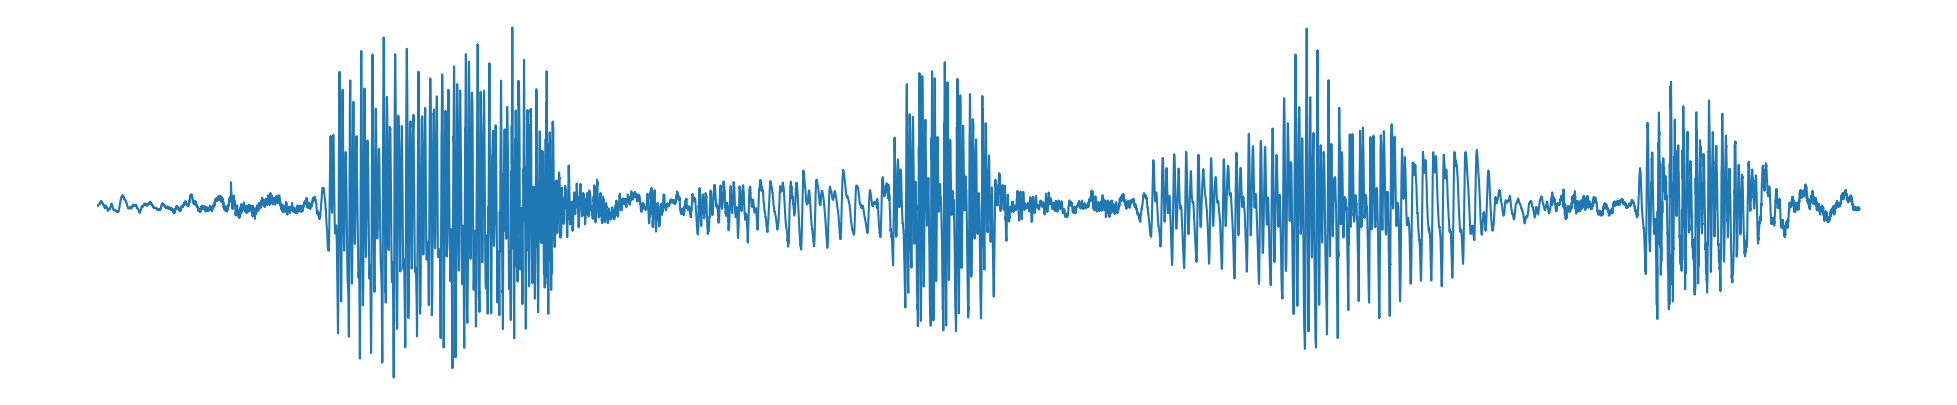

In [14]:
plt.figure(figsize=(25, 5))
plt.plot(audio[0][:len(audio[0]) // 4])
plt.axis('off')
plt.savefig(
        f"/home/xt0r3-user/cambridge/partii/dissertation/final/figs/chapter-3/reverb/start.png",
        bbox_inches="tight",
    )

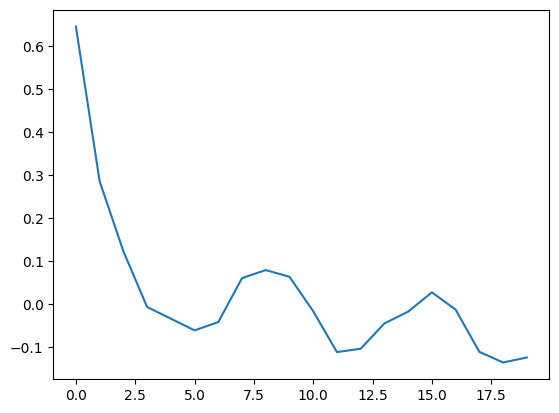

In [15]:
plt.plot(wavs[3][141:161])

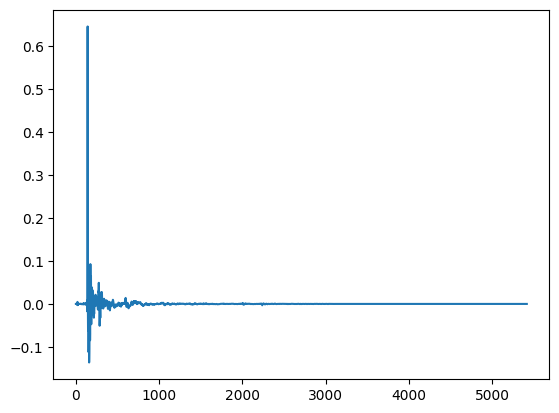

In [16]:
plt.plot(wavs[3])

In [17]:
wavs[3].argmax()

tensor(141)

In [18]:
wavs[3].max()

tensor(0.6460)

In [19]:
torch.cat([torch.zeros(t),audio[0][t:]]) 

NameError: name 't' is not defined

(-0.1314578125, 2.7606140624999997, -1.5703612744808197, 1.5942990958690644)

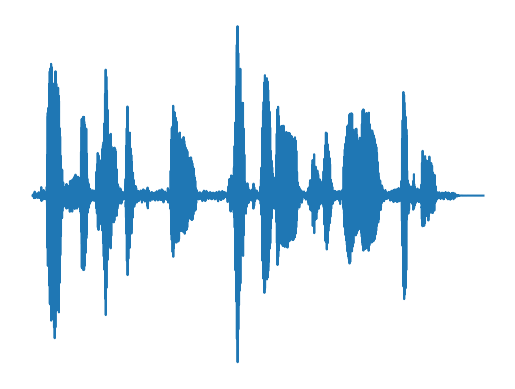

In [ ]:
plot_rev(3)
plt.axis('off')

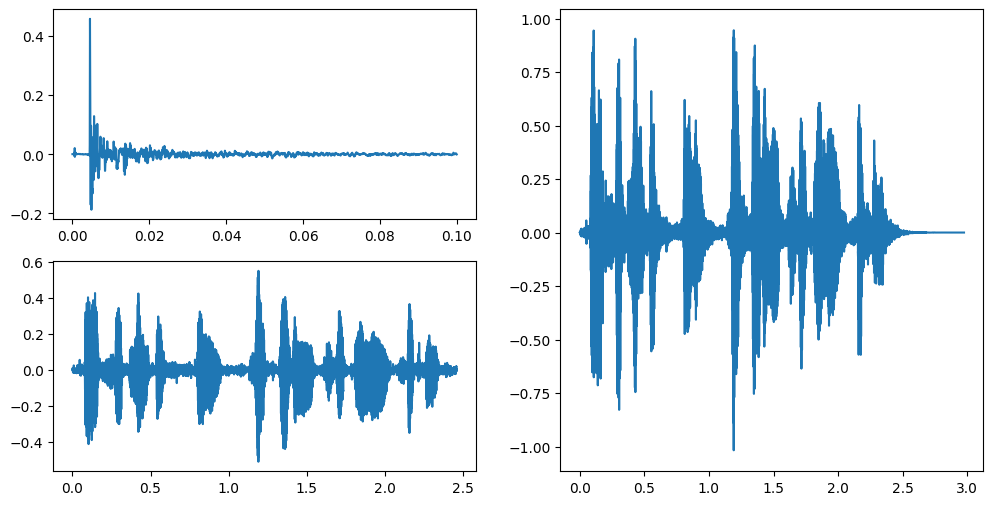

In [ ]:
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,3)
ax3 = plt.subplot(1,2,2)

n = 12

plot(wavs[n][:int(0.1*sr)], ax=ax1)
plot(audio[0], ax=ax2)
plot_rev(n, ax=ax3)

In [ ]:
rng = torch.Generator()
rng.manual_seed(1337)
n = 5
indices = torch.randint(
    0,
    len(wavs),
    (n,),
    generator=rng,
)

fig, ax = plt.subplots(figsize=(10, 2 * n))

for i, idx in enumerate(indices):
    plt.plot(torchaudio.functional.fftconvolve(audio[0], wavs[idx]))
    plt.axis('off')
    plt.savefig(f"wav_{i}.png", bbox_inches='tight')
    plt.clf()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 2))
plt.plot(audio[0], color='k')
plt.axis('off')
plt.savefig(f"wav.png", bbox_inches='tight')
plt.clf()

In [ ]:
plot(audio[0])

In [ ]:
play_audio(audio[0], 16000)

In [ ]:
augmentation = AddNoise(
    prob=1.0,
    snr_low=0,
    snr_high=0.4,
    device="cpu",
    seed=1337,
)
audio = torch.nn.utils.rnn.pad_sequence(audio, batch_first=True)
lens = torch.tensor([len(audio[0]), len(audio[1])], dtype=torch.long)
aug_audio =     augmentation(
        audio,
        lens,
    )
play_audio(
    aug_audio[0],
    sample_rate=16000,
)

audio - aug_audio